# Workshop 2: Numpy and Matplotlib
# Part II: Basic Matplotlib

We just learned how to create and manipulate arrays with NumPy.
At this point you might be getting curious what these arrays "look" like. So we need to introduce some way to visualize data. Matplotlib is the standard python plotting library.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# this is necessary to see plots in the cell output field

Here you see a different way of importing packages `from [] import [] as []`, this is useful of you want to use a certain module only. The `pyplot` of `matplotlib` module covers all out basic plotting needs.

In [2]:
type(plt)

module

(50, 100) (50, 100)


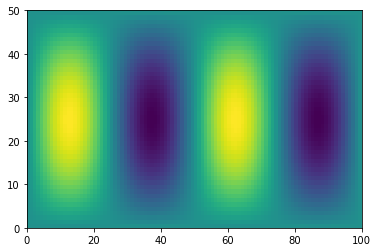

In [3]:
# recreate arrays we left with in the previous notebook
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape
f = np.sin(xx) * np.cos(0.5*yy)
g = f * x
plt.pcolormesh(f)
print(f.shape, g.shape)

## Manipulating array dimensions ##

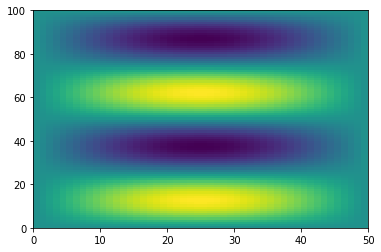

In [4]:
# transpose
plt.pcolormesh(f.T)

In [5]:
# reshape an array (wrong size) -> error
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

5000


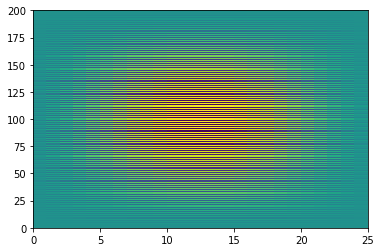

In [6]:
# reshape an array (right size) and mess it up
print(f.size)
h = np.reshape(f, (200,25))
plt.pcolormesh(h)

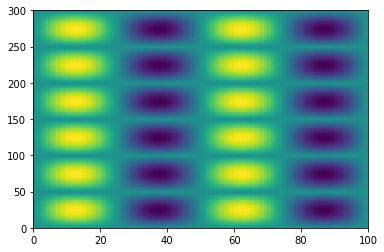

In [7]:
# tile an array
# in this case repeat the array 6 times in the y-direction
plt.pcolormesh(np.tile(f,(6,1)))

In [8]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

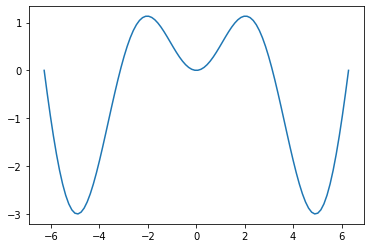

In [9]:
plt.plot(x, g_ymean)

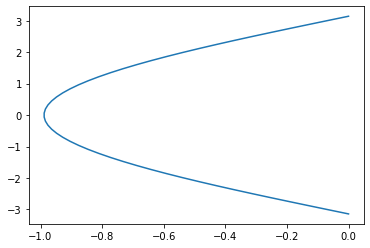

In [10]:
plt.plot(g_xmean, y)

### Labelling plots

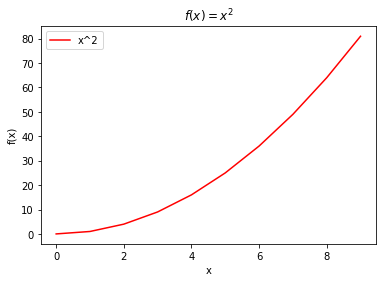

In [11]:
x = np.arange(10)
y = x**2

plt.plot(x, y, color='red', label='x^2')
plt.title(r'$f(x)=x^2$')  # you can use LaTeX syntax if you prepend an r to the string
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

### Other plot types

Matplotlib can do many other kinds of plots, for example, scatter plots, bar charts, histograms, ... check out their excellent gallery: 
### [Matplotlib Gallery link](https://matplotlib.org/gallery/index.html)

## <span style="color:blue">Exercises</span>

1. Line plots: Create a figure of several lines $\sin(x)$, $\cos(x)$, $\sqrt x$ for $x\in[0,\pi]$ using different line styles (see the plt.plot docstring). Add labels to the axes, give it a title, and create a legend.
<img src="figures/2b1.png" width="600">

2. Create a histogram of 1000 samples of a normal distribution. Set the bin size to 0.5. Save the figure as `normal.png` using the `plt.savefig()` function.
<img src="figures/2b2.png" width="600">

3. Create a scatter plot of 1000 random data points and color them according to their angle.
<img src="figures/2b3.png" width="600">

4. Recreate the first plot, but now as a contour plot. Add a colorbar.
<img src="figures/2b4.png" width="600">

5. Create a 2D histogram of a Normal distribution. Change the colormap.
<img src="figures/2b5.png" width="600">

## <span style="color:green">Solutions</span>
Again, these are possible solutions.

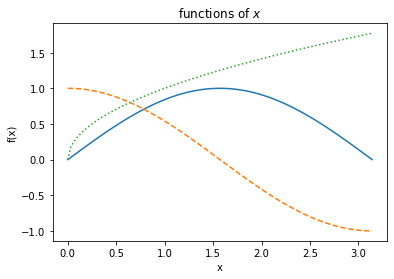

In [12]:
# 1. Line plots: Create a figure of several lines $\sin(x)$, 
#$\cos(x)$, $\sqrt x$ for $x\in[0,\pi]$ using different line 
# styles (see the plt.plot docstring). Add labels to the axes, 
# give it a title, and create a legend.
x = np.linspace(0, np.pi, 100)
plt.plot(x, np.sin(x), label=r'$\sin(x)$', ls='-')
plt.plot(x, np.cos(x), label=r'$\cos(x)$', ls='--')
plt.plot(x, np.sqrt(x), label=r'$\sqrt x$', ls=':')
plt.title(r'functions of $x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('figures/2b1')

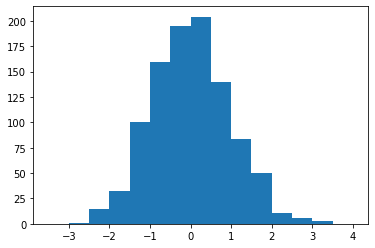

In [13]:
# 2. Create a histogram of 1000 samples of a normal distribution. 
# Set the bin size to 05.
# Save the figure as `normal.png` using the `plt.savefig()` function.
x = np.random.standard_normal(1000)
plt.hist(x, bins=np.arange(-3.5,4.1,.5))
plt.savefig('figures/2b2')

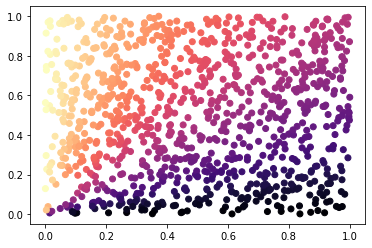

In [14]:
# 3. Create a scatter plot of 1000 random data points and 
# color them according to their angle.
x = np.random.rand(1000)
y = np.random.rand(1000)
angle = np.arctan(y/x)
plt.scatter(x=x, y=y, c=angle, cmap='magma')
plt.savefig('figures/2b3')

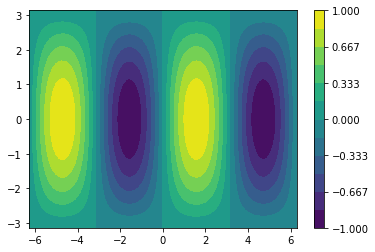

In [15]:
# 4. Recreate the first plot, but now as a filled contour plot.
# Add a colorbar.
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
f = np.sin(xx) * np.cos(0.5*yy)
plt.contourf(xx, yy, f, levels=np.linspace(-1,1,13))
plt.colorbar()
plt.savefig('figures/2b4')

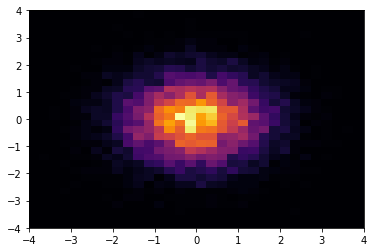

In [16]:
# 5. Create a 2D histogram of a Normal distribution.
# Change the colormap.
x = np.random.standard_normal(10000)
y = np.random.standard_normal(10000)
bins = np.linspace(-4,4,33)
plt.hist2d(x, y, bins=(bins,bins), cmap='inferno');  
# the semicolon suppresses the standard output which writes out the bins
plt.savefig('figures/2b5')